In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aubio
import librosa
import librosa.display
import librosa.util
from IPython.display import Audio

In [198]:
y,sr=librosa.load("testing.wav")
Audio(data=y,rate=sr)

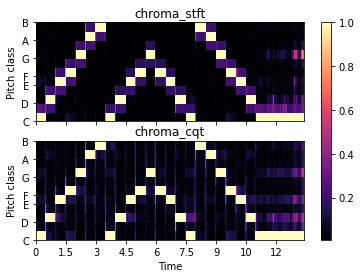

In [202]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

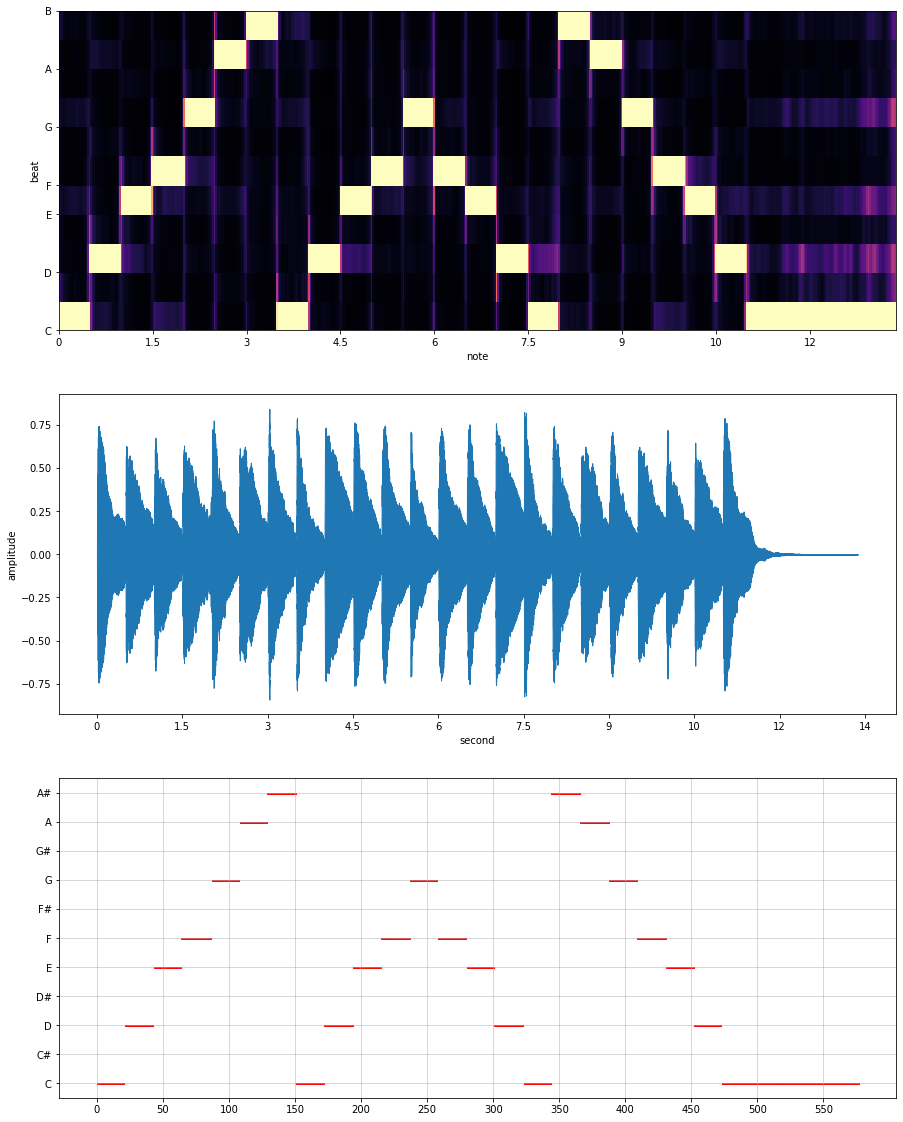

In [199]:
chroma=librosa.feature.chroma_cqt(y=y, sr=sr) 
 
c=pd.DataFrame(chroma)
c0=(c==1)
c1=c0.astype(int)
labels=np.array(range(1,13))
note_values=labels.dot(c1)
 
plt.figure(figsize=(15,20))
 
plt.subplots_adjust(wspace=1, hspace=0.2)
 
plt.subplot(311)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.xlabel('note')
plt.ylabel('beat')
note_values=labels.dot(c1)
 
plt.subplot(312)
librosa.display.waveshow(y, sr=sr)
plt.xlabel('second')
plt.ylabel('amplitude')
 
plt.subplot(313)
plt.grid(linewidth=0.5)
plt.xticks(range(0,600,50))
plt.yticks(range(1,13),["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"])
plt.scatter(range(len(note_values)),note_values,marker="s",s=1,color="red")
 
plt.show()

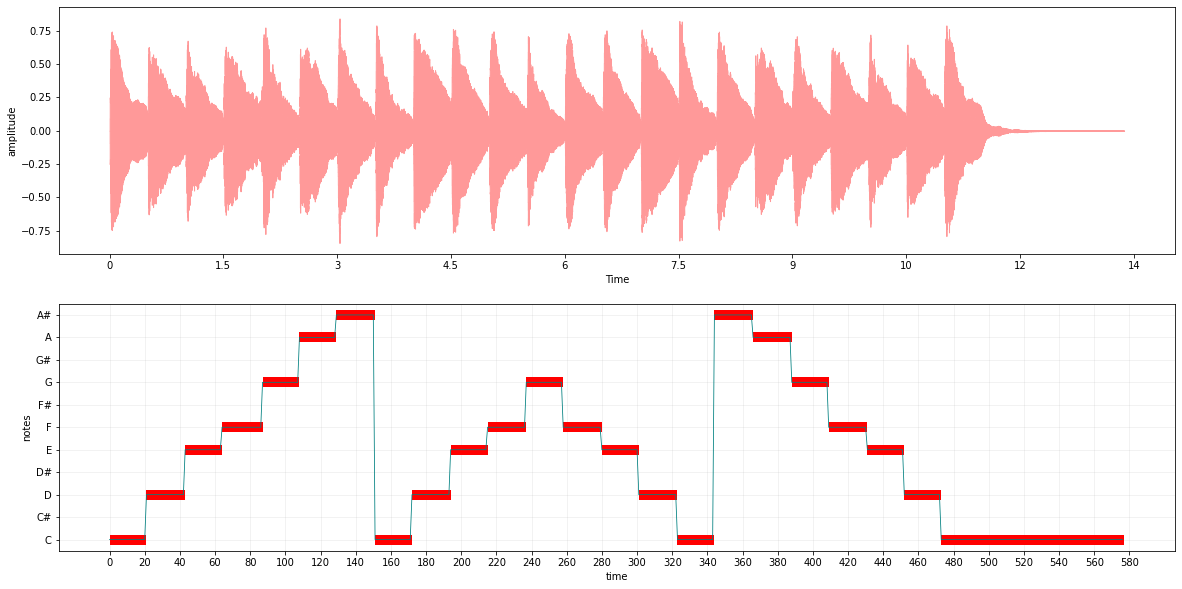

In [200]:
chroma=librosa.feature.chroma_cqt(y=y, sr=sr) 
 
c=pd.DataFrame(chroma)
c0=(c==1)
c1=c0.astype(int)
labels=np.array(range(1,13))
note_values=labels.dot(c1)
 
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=1, hspace=0.2)
 
plt.subplot(211)
plt.xlabel('second')
plt.ylabel('amplitude')
librosa.display.waveshow(y, sr=sr,color="#ff9999")
 
plt.subplot(212)
plt.xlabel('time')
plt.ylabel('notes')
plt.grid(linewidth=0.5,alpha=0.3)
plt.xticks(range(0,600,20))
plt.yticks(range(1,13),["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"])
plt.plot(note_values,color="#008080",linewidth=0.8)
plt.hlines(note_values, range(len(note_values)),np.array(range(len(note_values)))+1 ,color="red", linewidth=10)